# Chap06 - 우선순위 바로잡기

# Getting our priorities straight

## 6.1 서론

이 장에서는 

> '적절한 사전확률분포를 어떻게 고를 것인가'

를 다룬다. 또한, 데이터셋이 커질수록 사전확률분포의 영향력이 어떻게 변화하는지 보여주고, 사전확률분포와 선형회귀의 패널티 간의 관계에 대해 알아본다. 

## 6.2 주관적인 사전확률분포 vs 객관적인 사전확률분포

베이지안 사전확률분포는 두 부류로 나눌 수 있다. 

1. **객관적인 사전확률분포**(objective priors)
    - 데이터가 사후확률분포에 최대한 영향을 미칠 수 있도록 하는 것이 목적
2. **주관적인 사전확률분포**(subjective priors)
    - 실무자가 사전확률분포에 자신의 견해를 반영하는 것

### 6.2.1 객관적인 사전확률분포

객관적인 사전확률분포의 예로 **균등분포**(uniform distribution)가 있다. 이러한 **평평한 사전확률분포**(flat prior)는 각각의 가능한 값에 동일한 비중을 부여할 수 있다. 이런 류의 사전확률 분포는 다음과 같은 **무차별성의 원리**(principle of indifference)이다.

> 어떤 값을 특별히 선호할 이유는 없다.

### 6.2.2 주관적인 사전확률분포

사전확률분포의 특정 영역이나 다른 곳에 확률질량(probability mass)을 추가한다면 더 많은 확률질량으로 그 영역에 존재하는 모수에 편향된 추론을 하게 되는데, 이러한 확률분포를 주관적인 사전확률분포라 한다.

In [2]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib

matplotlib.rc('font', family='NanumGothic')  # Linux
figsize(12.5, 3)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

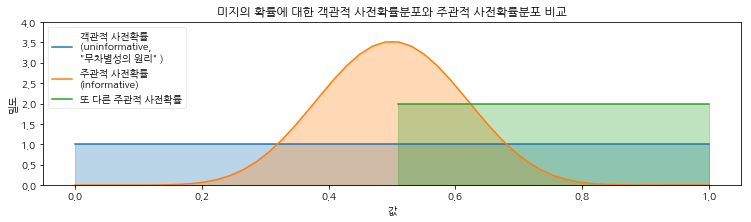

In [6]:
x = np.linspace(0, 1)
y1, y2 = stats.beta.pdf(x, 1, 1), stats.beta.pdf(x, 10, 10)

x = np.linspace(0, 1)
y1, y2 = stats.beta.pdf(x, 1, 1), stats.beta.pdf(x, 10, 10)

p = plt.plot(x, y1,
    label='객관적 사전확률\n(uninformative, \n"무차별성의 원리" )')
plt.fill_between(x, 0, y1, color=p[0].get_color(), alpha=0.3)

p = plt.plot(x, y2, label="주관적 사전확률\n(informative)")
plt.fill_between(x, 0, y2, color=p[0].get_color(), alpha=0.3)

p = plt.plot(x[25:], 2 * np.ones(25), label="또 다른 주관적 사전확률")
plt.fill_between(x[25:], 0, 2, color=p[0].get_color(), alpha=0.3)

plt.ylim(0, 4)
plt.ylim(0, 4)
leg = plt.legend(loc="upper left")
leg.get_frame().set_alpha(0.4)
plt.xlabel("값")
plt.ylabel("밀도")
plt.title("미지의 확률에 대한 객관적 사전확률분포와 주관적 사전확률분포 비교");

### 6.2.3 결정, 결정 ...

객관적인 사전확률분포나 주관적인 사전확률분포는 보통 해결하려는 문제에 따라 선택한다. 하지만, 객관적인 사전확률분포와 주관적인 사전확률분포 중 어느 것을 우선적으로 선택해야 하는 경우가 종종 있다. 예를 들어, 과학 연구의 경우 결과에 대한 편향을 제거해야 하므로 객관적인 사전확률분포를 선택하는 것이 당연하다.

> 모델이 적합한 이후에는 사후확률분포를 살펴보아야 하고, 이치에 맞는지 확인해야 한다. 만일 사후확률분포가 이치에 맞지 않는다면 모델에 포함되지 않은 사전 정보가 추가로 필요하다는 것을 의미한다. 그리고 이전에 사용한 사전확률분포의 가정에 위배된다는 것을 의미한다. 그래서 이전으로 돌아가 사전확률분포가 외부 정보와 조화되도록 변경하는 것이 적절하다. *-젤먼(Gelman)-*

사후확률분포가 우리가 생각한 것과 맞지 않다고 생각하는 것은 곧, 사후확률분포가 어떤 모습이어야 하는지 생각하고 있었으며, 현재의 사전확률분포가 모든 사전 정보를 갖고 있지 않고 업데이트가 필요하다는 것을 의미한다. 이 때 현재의 사전확률분포를 버리고 모든 사전 정보의 여러가지 면을 반영할 수 있다.

### 6.2.4 경험적 베이즈

**경험적 베이즈**(empirical Bayes)는 빈도주의와 베이지안 추론을 결합한 트릭이다. 베이지안과 경험적 베이즈 방법 간의 유의미한 차이는 바로 베이지안 방법은 하이퍼파라미터(hyperparameters) $\alpha$와 $\tau$인 사전확률분포를 갖지만, 경험적 베이즈 방법은 사전확률분포에 대한 어떠한 개념도 없다. 경험적 베이즈는 빈도주의 방법으로 $\alpha$와 $\tau$를 선택하고, 그런 다음 베이지안 방법으로 문제를 해결한다.

간단한 예는 다음과 같다. $\sigma = 5$인 정규확률분포의 모수 $\mu$를 추정하고 싶다고 하자. $\mu$의 범위는 실수이므로 정규확률분포를 $\mu$에 대한 사전확률분포로 사용할 수 있다. 그리고 사전확률분포의 하이퍼파라미터($\mu_p, \sigma_{p}^{2}$)를 선택해야 한다. 모수 $\sigma_{p}^{2}$는 우리가 가진 불확실성을 반영하도록 선택한다. $\mu_p$에 대해서는 다음 중 하나를 선택할 수 있다.

- 경험적 베이즈는 관측된 경험적 평균 주변에 사전확률분포의 중심을 맞추는 경험적 표본평균을 사용할 것을 권장한다.
$$
\mu_p = \frac{1}{N} \sum_{i=0}^{N}{X_i}
$$

- 전통적인 베이즈 추론은 사전적 지식 또는 여러 객관적인 사전확률분포(평균이 0이고 두터운 표준편차)를 사용할 것을 권장한다. 

객관적인 베이지안 추론에 비해 경험적 베이즈는 덜 객관적일 수 있다. 그 이유는 모수는 데이터를 통해 정해져서 객관적이라 할 수 있지만, 사전확률 모델은 사람이 선택하므로 주관적이기 때문이다.

이 책의 저자는 경험적 베이즈 방법은 **데이터를 중복 계산**하고 있다고 말한다. 그 이유는 관측 데이터의 결과에 영향을 준 데이터를 사전확률분포에서 한번 사용하고, MCMC를 이용해 추론할 때 또 한번 사용하기 때문에 불확실성을 과소평가할 수 있기 때문이다. 

이러한 이유로 저자는 데이터가 적을 경우 사전확률이 지나친 영향력을 가질 수 있어 데이터가 많을 때만 경험적 베이즈를 사용하라고 권한다. 또한 가능하면 $\sigma_{p}^{2}$를 크게하여 높은 불확실성을 유지할 것을 권한다.